In [2]:
#install.packages("igraph")
library(igraph);
packageVersion("igraph")


[1] '1.4.2'

In [3]:
library(ggplot2);

In [5]:
#install.packages("corrplot")
library(corrplot);

In [7]:
#install.packages("pROC")
library(pROC);

In [9]:
#install.packages("randomForest")
library(randomForest);

In [10]:
#install.packages("lift")
library(lift);

In [12]:
#install.packages("exactRankTests")
library(exactRankTests);

In [14]:
#install.packages("car");
library(car);

In [15]:
#'customers', 'edgeList', 'g1'
load("StudentEdgelist.RData")
ls()

[1] "edgeList"

In [16]:
#'customers', 'edgeList', 'g1'
load("StudentCustomers.RData")
ls()

[1] "customers" "edgeList"

,from,to
,<fct>,<fct>
1,1,393
2,1,2573
3,1,4430
4,2,101
5,2,578
6,2,691


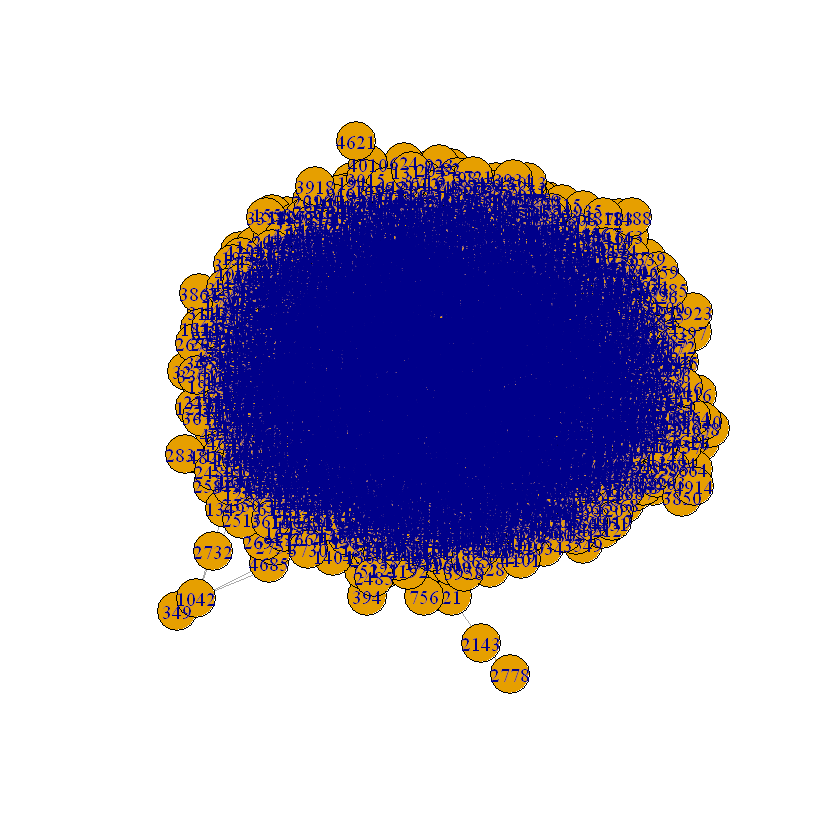

In [17]:
# Inspect edgeList
head(edgeList)

# Construct the igraph object
network <- graph_from_data_frame(edgeList, directed = FALSE)

# View your igraph object
plot(network)

#### Relational Network Classifier:
#### Assign the label to the node based on the neighbours assuming the linked nodes have a propensity to have the same label 

,id,churn
,<fct>,<dbl>
1,1,0
393,393,0
2573,2573,0
4430,4430,0
2,2,0
101,101,0



   0    1 
4190  774 

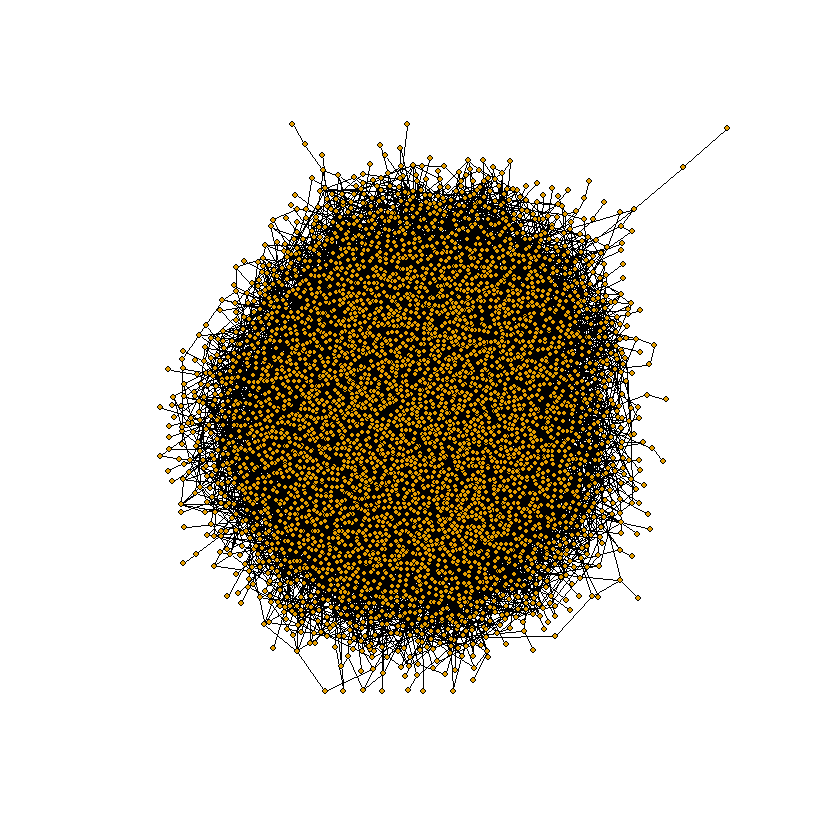

In [18]:
# Inspect the customers dataframe
head(customers)

# Count the number of churners and non-churners
table(customers$churn)

# Add a node attribute called churn
V(network)$churn <- customers$churn

# Visualize the network
plot(network, vertex.label = NA, edge.label = NA,
    edge.color = 'black', vertex.size = 2)

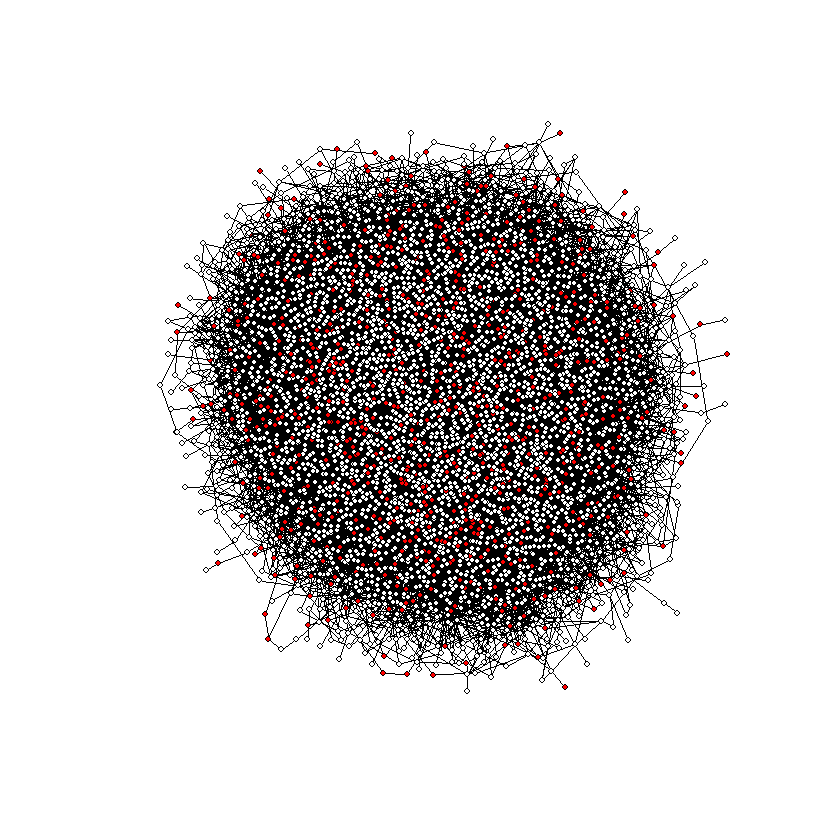

In [19]:
# Add a node attribute called color
V(network)$color <- V(network)$churn

# Change the color of churners to red and non-churners to white
V(network)$color <- gsub("1", "red", V(network)$color) 
V(network)$color <- gsub("0", "white", V(network)$color)

# Plot the network
plot(network, vertex.label = NA, edge.label = NA,
    edge.color = "black", vertex.size = 2)

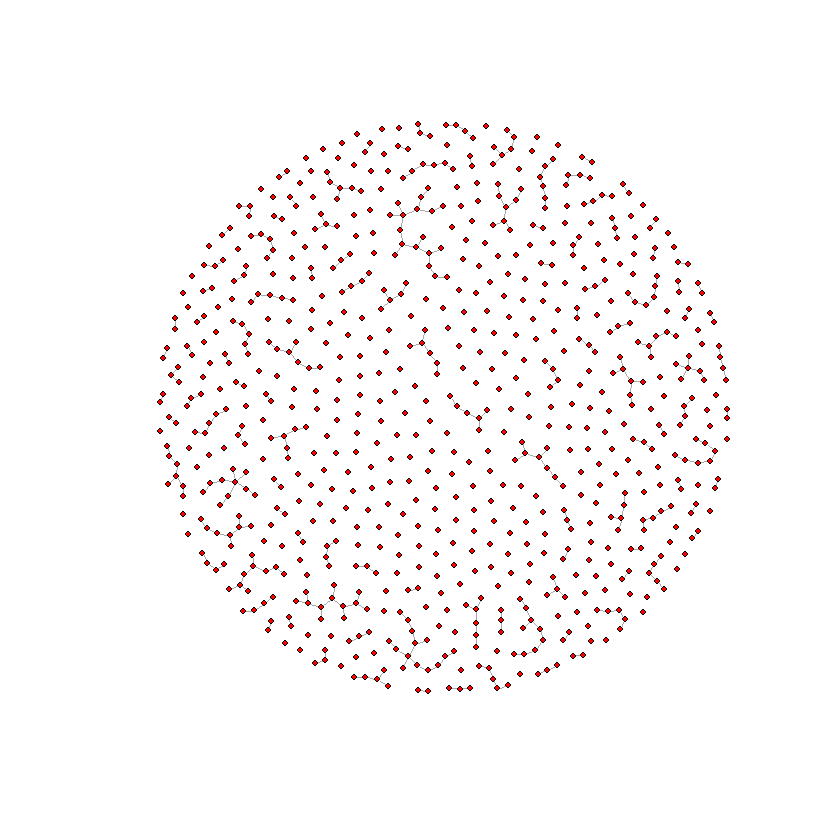

In [20]:
# Create a subgraph with only churners
churnerNetwork <- induced_subgraph(network, v = V(network)[which(V(network)$churn == 1)])
                    
# Plot the churner network 
plot(churnerNetwork, vertex.label = NA, vertex.size = 2)

#### To compute chrun probablities, \#ChurnNeighbors, \#NonChurnNeighbors are needed for each node 

In [21]:
# Initialize the two lists
ChurnNeighbors <- rep(0, length(V(network)))
NonChurnNeighbors <- rep(0, length(V(network)))
count = 1 
# Iterate over each vertex
for (v in V(network)) {
    # Get the neighbors of the current vertex
    neighbors <- neighbors(network, v)

    # Count the number of churned and non-churned neighbors
    num_churned_neighbors <- sum(V(network)$churn[neighbors] == 1)
    num_non_churned_neighbors <- sum(V(network)$churn[neighbors] == 0)

    # Add the counts to the corresponding lists
    ChurnNeighbors[count] <- as.numeric(num_churned_neighbors)
    NonChurnNeighbors[count] <- as.numeric(num_non_churned_neighbors)
    count <- count+1 
}

# Print the lists
print(ChurnNeighbors)
print(NonChurnNeighbors)


   [1] 0 2 2 0 1 0 0 0 0 2 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 2 1 0 2 2
  [38] 1 0 1 0 1 0 1 0 1 2 0 0 0 2 1 0 0 1 2 1 0 0 2 1 0 1 1 2 2 0 1 3 2 0 0 1 1
  [75] 0 2 0 1 1 1 1 2 2 0 2 0 0 1 1 2 2 2 2 0 0 2 0 1 0 3 2 3 3 1 2 1 1 0 2 2 0
 [112] 1 3 0 3 0 0 2 4 1 0 0 2 2 1 1 1 0 0 1 2 1 3 1 3 1 0 0 1 0 1 0 0 0 0 0 3 1
 [149] 0 1 1 1 3 0 1 2 0 1 1 0 3 2 0 2 0 2 2 1 1 3 1 0 0 1 0 2 1 0 1 0 3 1 0 1 5
 [186] 0 0 1 2 1 0 0 2 2 2 0 1 2 1 0 1 2 3 3 0 2 0 1 4 0 1 2 2 1 1 2 0 0 1 4 0 0
 [223] 2 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 2 2 1 0 2 2 2 1 0 0 0 0 0 1 1 2 2 2 0 4 1
 [260] 2 0 1 0 0 1 0 1 0 2 0 2 0 0 0 1 0 1 1 2 0 1 0 0 2 0 0 2 2 1 3 2 0 1 3 0 1
 [297] 3 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 2 0 0 2 2 1 0 2 2 1 2 2 2 2 1 2
 [334] 0 1 1 0 0 1 2 1 2 2 1 0 3 1 2 0 1 0 2 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 2 1
 [371] 1 1 1 2 2 1 0 1 1 1 2 0 0 2 1 0 0 2 2 1 2 0 1 1 0 3 1 0 0 0 2 0 1 0 0 3 0
 [408] 2 0 0 2 0 0 5 3 1 0 0 2 1 0 2 2 2 5 1 0 1 0 0 1 1 0 3 0 1 0 2 2 1 2 2 0 1
 [445] 1 2 0 1 0 1 0 1 1 1 1

   [1]  3  5  2  2  4  6  6  4  5  1  9  5  3  8  3  3  5  5  5  4  3  5  6  3
  [25]  2  2  4  4  1  3  7  3  4  2  9  7  1  4  7  3  4  2  4  3  3  8  3  2
  [49]  4  1  6  4  5  3  3  5  6  2  2  6  3  9  3  3  4  4  4  7  8  4  3  1
  [73]  8  7  4  1  5  1  3  3  4  5  3  5  6  1 10  5  4  6  2  4  9  5  6  5
  [97]  6  4  6  7  9  3  5  5  5  4  6  1  4  1  1  6  7 10  2  1  4  6  4  4
 [121]  1  4  8  0  4  1  1 10  2  7  5  6  3  3  1  3  4  3  4  3  3  7  4  6
 [145]  7  6  2  6  4  3  4  4  6  5  3  1  1  4  1  6  6  6  3  7  5  4  2  3
 [169]  6  6  7  4  4  5  5  5  7  2  8  8  5  6  7  9  5  7  3  3  5  5  6  7
 [193]  9  1  4  9  4  3  6  3  2  3  0  6  2  3  3  4  9  6  4  4  5  6  6  3
 [217]  3  3  5  2  7  5  5  2  7  3  7  4  4  1  5  3  4  3  4  4  5  3  8  3
 [241]  6  3  4  5  3  4  5  6  6  1  3  4  7  6  3  8  7  4  7  3  2  3  5  1
 [265]  7  8  4  5  3  3  7  7  6  5  7  9  6  5  4  2  3  1  7  4  7  2  5  5
 [289]  3  2  4  9  6  6  5  5  5  8  7  2  3  4  2 

In [22]:
# Compute the churn probabilities
churnProb <- ChurnNeighbors / (ChurnNeighbors + NonChurnNeighbors)

# Find who is most likely to churn
mostLikelyChurners <- which(churnProb == max(churnProb))

# Extract the IDs of the most likely churners
customers$id[mostLikelyChurners]

[1] 3115 4488 1223 4823 4980 4359 2551 564  1143 464  1705 1311 1313 4218 1319
[16] 2434 4423 3594 4647 2201 1630 3698 1454 1743 4599 3194 3155 2502 1880 4081
[31] 4795 3976 2220 3417 3672 2742 3047 3073 4408 4203 3958 3794 4181 3825 4621
5000 Levels: 1 10 100 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 ... 999

In [23]:
# create the neighbours count matrix
total_neighbours = ChurnNeighbors + NonChurnNeighbors

# create the adjacency matrix
AdjacencyMatrix <- get.adjacency(network)

[1] "Node number 44"

[1] "Churners 1"

[1] "NonChurners 3"

[1] "Total Neighbours 4"

[1] "Expected Churn Probablity 0.25"

[1] 0.25


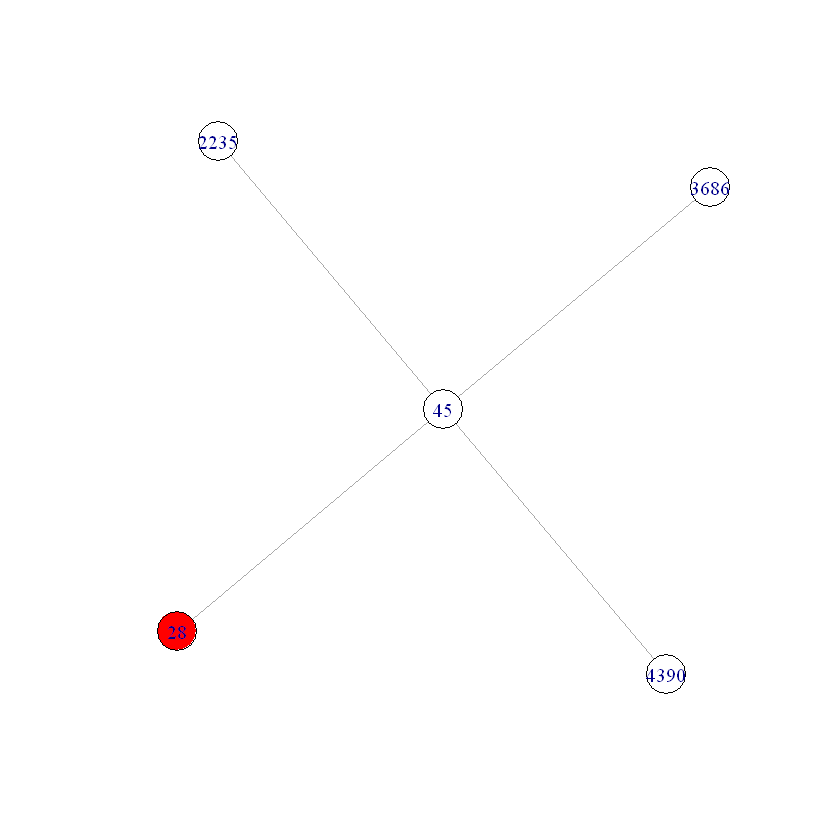

In [25]:
#Check everything is giving the expected outputs 

# Make an ego graph
node_number = which(V(network)$name == 45)

g <- make_ego_graph(network, nodes = node_number, order = 1)[[1]]

paste('Node number', node_number)
paste('Churners', ChurnNeighbors[node_number])
paste('NonChurners', NonChurnNeighbors[node_number])
paste('Total Neighbours', total_neighbours[node_number])
paste('Expected Churn Probablity', ChurnNeighbors[node_number]/total_neighbours[node_number])
print(churnProb[node_number])
plot(g)

#### Challanges of Netweork:
#### 1. Train/Test splits problems
#### 2 The nodes are not iid
#### 3. Collective Infrence: needs simultaneously label nodes in interconnected data to reduce classification error.

In [19]:
V(network)[44]

+ 1/4964 vertex, named, from 1b4883f:
[1] 45

In [20]:
# Find churn probability of the 44th customer
churnProb[44]

# Update the churn probabilties and the non-churn probabilities
churnProb_updated <- as.vector((AdjacencyMatrix %*% churnProb) / total_neighbours)

# Find updated churn probability of the 44th customer
churnProb_updated[44]

[1] 0.25

[1] 0.2166667

In [21]:
#Check the percentage of elemnts that have a larger probablistic relational neighbours, equal, and smaller 

total_len <- length(churnProb)

same_indices <- sum(churnProb == churnProb_updated)
larger_indices <- sum(churnProb < churnProb_updated)
smaller_indices <- sum(churnProb > churnProb_updated)


sentence <- paste("Percentage with the same updated churn probablity:",  same_indices/total_len *100,
                  "with larger:", larger_indices/total_len *100,
                  "with smaller:", smaller_indices/total_len*100)
print(sentence)

[1] "Percentage with the same updated churn probablity: 2.92103142626914 with larger: 54.4319097502014 with smaller: 42.6470588235294"


In [22]:
# Compute the AUC
auc(customers$churn, as.vector(churnProb))

# Write a for loop to update the probabilities
for(i in 1:10){
 churnProb_ci <- as.vector((AdjacencyMatrix %*% churnProb) / total_neighbours)
}

# Compute the AUC again
auc(customers$churn, as.vector(churnProb_ci))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.5215

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9657

## Homophily: High D and small H, but not necessarily both 

#### Calculate the count of the edges 

In [23]:
# Add the column edgeList$FromLabel
edgeList$FromLabel <- customers[match(edgeList$from, customers$id), 2]
 
# Add the column edgeList$ToLabel
edgeList$ToLabel <- customers[match(edgeList$to, customers$id), 2]
 
# Add the column edgeList$edgeType
edgeList$edgeType <- edgeList$FromLabel + edgeList$ToLabel
 
# Count the number of each type of edge
table(edgeList$edgeType)


head(edgeList[edgeList$edgeType == 2, ])


   0    1    2 
8842 2996  653 

,from,to,FromLabel,ToLabel,edgeType
,<fct>,<fct>,<dbl>,<dbl>,<dbl>
13,3,2051,1,1,2
17,6,957,1,1,2
20,6,4061,1,1,2
22,7,25,1,1,2
23,7,2029,1,1,2
29,8,476,1,1,2


In [24]:
# Count churn edges
ChurnEdges <- sum(edgeList$edgeType == 2)
 
# Count non-churn edges
NonChurnEdges <- sum(edgeList$edgeType == 0)
 
# Count mixed edges
MixedEdges <- sum(edgeList$edgeType == 1)
 
# Count all edges
edges <- ChurnEdges + NonChurnEdges + MixedEdges

#Print the number of edges
edges

[1] 12491

#### Calculate the count of the nodes 

In [25]:
# Count the number of churn nodes
ChurnNodes <- sum(customers$churn == 1)
 
# Count the number of non-churn nodes
NonChurnNodes <- sum(customers$churn == 0)
 
# Count the total number of nodes
nodes <- ChurnNodes + NonChurnNodes
 
# Compute the network connectance
connectance <- 2 * edges / nodes / (nodes - 1)

# Print the value
connectance

[1] 0.001014031

### Dyalicity: connectedness between nodes with the same label. 
#### D>1 its dyadic and the same labels are connected together more than what we would expect in a random scenario 
#### D=1 its equivilant to random scenario
#### D<1 ts anti-diadic and the same labels tend not to connect together

In [26]:
# Compute the expected churn dyadicity
ExpectedDyadChurn <- ChurnNodes * (ChurnNodes-1) * connectance / 2
 
# Compute the churn dyadicity
DyadChurn <- ChurnEdges / ExpectedDyadChurn
 
# Inspect the value
DyadChurn

[1] 2.152641

In [27]:
# Compute the expected non-churn dyadicity
ExpectedDyadNonChurn <- NonChurnNodes * (NonChurnNodes-1) * connectance / 2
 
# Compute the churn dyadicity
DyadNonChurn <- NonChurnEdges / ExpectedDyadNonChurn
 
# Inspect the value
DyadNonChurn

[1] 0.9935849

### Heterophilicity: connectedness between nodes with opposite labels 
#### H>1 its hetrophilic and the opposite labels are connected together more than what we would expect in a random scenario 
#### H=1 its equivilant to random scenario
#### H<1 ts heterophobic and the opposite labels tend not to connect together

In [28]:
# Compute the expected heterophilicity
ExpectedHet <- connectance * ChurnNodes * NonChurnNodes
 
# Compute the heterophilicity
Het <- MixedEdges / ExpectedHet
 
# Inspect the heterophilicity
Het

[1] 0.9110363

## Basic Network Features: Neighbourhood, Centrality, Transitivity(clustering coefficient)

### Neighbourhood
#### Degree: The number of the nodes connected to each node. Can be: First order, Second order
#### Triangles: consists of three nodes that are all connected to each other

In [29]:
# Extract network degree
V(network)$degree <- degree(network, normalized=TRUE)

In [30]:
# Extract 2.order network degree
degree2 <- neighborhood.size(network, 2)

# Normalize 2.order network degree
V(network)$degree2 <- degree2 / (length(V(network)) - 1)

In [31]:
# Extract number of triangles
V(network)$triangles <- count_triangles(network)

### Centrality: measures the impact nodes have on the whole network
#### Betweeness: counts how often the shortest path between two nodes goes through a given node and gives an indication of how much information passes through a node
#### Closness:  how many steps are required to get to every other node in the network


In [32]:
# Extract the betweenness
V(network)$betweenness <- betweenness(network, normalized=TRUE)

head(V(network)$betweenness)

[1] 0.0001929510 0.0012730491 0.0003783724 0.0000703030 0.0008666186
[6] 0.0012448765

In [33]:
# Extract the closeness
V(network)$closeness <- closeness(network, normalized=TRUE)

head(V(network)$closeness)

[1] 0.1704327 0.1885280 0.1777770 0.1646540 0.1833056 0.1865789

In [34]:
# Extract the eigenvector centrality
V(network)$eigenCentrality <- eigen_centrality(network, scale = TRUE)$vector

head(V(network)$eigenCentrality)

[1] 0.07288149 0.22122750 0.11347160 0.04941012 0.17480979 0.21284112

High eigenCentrality and low closeness could suggest that the node is in a "remote" location in the network, far away from other nodes and difficult to reach. 
Low eigenCentrality and high betweeness could suggest that the node is located in a "bottleneck" area of the network, where many shortest paths converge and pass through, leading to high betweenness scores

### Transitivity: obtained by dividing the number of triangles by the number of triads each node. Can be local per node and global for the network
#### Triangles: 3 nodes, 3 edges
#### Triads: 3 nodes, 2 edges

nodes in the network are less likely to have connections to each other or to form groups cause of the low transitivity

In [35]:
# Extract the local transitivity
V(network)$transitivity <- transitivity(network, type='local', isolates='zero')

# Compute the network's transitivity
transitivity(network)

[1] 0.001053943

If the nodes in the network represent people, a low transitivity and high dyadicity would suggest that people tend to form connections with others who are similar or close to them, but there are few connections between different groups or communities. 

## Link Based Network Features: 

In [36]:
my_matrix <- matrix(c(0, 1, 0,
                      1, 0, 1,
                      0, 1, 0), nrow = 3, byrow = TRUE)
my_matrix

0,1,0
1,0,1
0,1,0


Second order matrix used to check whether there is length-2 walk between two nodes 

In [37]:
# Extract the adjacency matrix
AdjacencyMatrix <- as_adjacency_matrix(network)

# Compute the second order matrix 
SecondOrderMatrix_adj <- AdjacencyMatrix %*% AdjacencyMatrix

# Adjust the second order matrix
SecondOrderMatrix <- ((SecondOrderMatrix_adj) > 0) + 0
diag(SecondOrderMatrix) <- 0

# Inspect the second order matrix
SecondOrderMatrix[1:10, 1:10]

  [[ suppressing 10 column names '1', '2', '3' ... ]]



10 x 10 sparse Matrix of class "dgCMatrix"
                      
1  0 . . . . . . . . .
2  . 0 . . . . . . . .
3  . . 0 . . . . . . .
5  . . . 0 . . . . . .
6  . . . . 0 . . . . 1
7  . . . . . 0 . . . .
8  . . . . . . 0 . . .
9  . . . . . . . 0 . .
10 . . . . . . . . 0 .
11 . . . . 1 . . . . 0

In [38]:
# Compute the number of churn neighbors
V(network)$ChurnNeighbors <- as.vector(AdjacencyMatrix %*% V(network)$churn)

# Compute the number of non-churn neighbors
V(network)$NonChurnNeighbors <- as.vector(AdjacencyMatrix %*% (1 - V(network)$churn))

# Compute the relational neighbor probability
V(network)$RelationalNeighbor <- as.vector(V(network)$ChurnNeighbors / 
    (V(network)$ChurnNeighbors + V(network)$NonChurnNeighbors))

head(V(network)$RelationalNeighbor)   ##Same as the one calculated using the for loop previously

[1] 0.0000000 0.2857143 0.5000000 0.0000000 0.2000000 0.0000000

In [39]:
# Compute the number of churners in the second order neighborhood
V(network)$ChurnNeighbors2 <- as.vector(SecondOrderMatrix %*% V(network)$churn)

# Compute the number of non-churners in the second order neighborhood
V(network)$NonChurnNeighbors2 <- as.vector(SecondOrderMatrix %*% (1 - V(network)$churn))

# Compute the relational neighbor probability in the second order neighborhood
V(network)$RelationalNeighbor2 <- as.vector(V(network)$ChurnNeighbors2 / 
    (V(network)$ChurnNeighbors2 + V(network)$NonChurnNeighbors2))

head(V(network)$RelationalNeighbor2)

[1] 0.25000000 0.10000000 0.13333333 0.22222222 0.03846154 0.07407407

In [40]:
# Extract the average degree of neighboring node
degree <- degree(network, normalized=FALSE)

V(network)$averageDegree <- 
    as.vector(AdjacencyMatrix %*% V(network)$degree) / degree

head(V(network)$averageDegree)

[1] 0.0010074552 0.0010650240 0.0009570824 0.0011082007 0.0012492444
[6] 0.0011417825

In [41]:
# Extract the average number of triangles of neighboring nodes
V(network)$averageTriangles <- 
    as.vector(AdjacencyMatrix %*% V(network)$triangles) / degree

head(V(network)$averageTriangles)

[1] 0.0 0.0 0.0 0.0 0.2 0.0

In [42]:
# Extract the average transitivity of neighboring nodes    
V(network)$averageTransitivity<-
    as.vector(AdjacencyMatrix %*% V(network)$transitivity) / degree

head(V(network)$averageTransitivity)

[1] 0.000000000 0.000000000 0.000000000 0.000000000 0.005555556 0.000000000

In [43]:
# Extract the average betweenness of neighboring nodes    
V(network)$averageBetweenness <- 
    as.vector(AdjacencyMatrix %*% V(network)$betweenness) / degree

head(V(network)$averageBetweenness)

[1] 0.0007941257 0.0009426371 0.0007500646 0.0008107394 0.0012355079
[6] 0.0012450989

## The PageRank Algorithm

In [44]:
# Compute one iteration of PageRank 
iter1 <- page.rank(network, algo = 'prpack', options = list(niter = 1))$vector

# Compute 10th iterations of PageRank 
iter10 <- page.rank(network, algo = 'prpack', options = list(niter = 10))$vector

# Inspect the change between one and two iterations
sum(abs(iter1 - iter10))

head(iter10)

[1] 0

1            2            3            5            6            7 
0.0001397364 0.0002710237 0.0001732028 0.0001018776 0.0002104196 0.0002564651

### Steps to understand why the page rank scores are the same in all iterations

In [45]:
#Check density 
gd <- edge_density(network)
gd

[1] 0.001014031

See if changing the density, would that change the page score rank difference? No change then its not a matter of the ratio of edges

In [46]:
num_nodes <- vcount(network)
num_edges <- ecount(network)


# Create one random graph with the same number of nodes and edges as g
g.random <- erdos.renyi.game(n = num_nodes, p = 5 * gd, type = "gnp")

# Compute one iteration of PageRank 
iter1_ran <- page.rank(g.random, algo = 'prpack', options = list(niter = 1))$vector

# Compute 10th iterations of PageRank 
iter10_ran <- page.rank(g.random, algo = 'prpack', options = list(niter = 100))$vector

# Inspect the change between one and two iterations
print(sum(abs(iter1_ran - iter10_ran)))

head(iter10_ran)

[1] 0


[1] 0.0001937425 0.0001658506 0.0002419068 0.0002206865 0.0001478605
[6] 0.0001869762

Check if the network has a pagerank score similar to a random one with the same edges and density 

In [47]:
# Create one random graph with the same number of nodes and edges as g
# Generate 1000 random graphs

# Compute one iteration of PageRank 
iter1_ran <- page.rank(g.random, algo = 'prpack', options = list(niter = 1))$vector

# Compute 10th iterations of PageRank 
iter10_ran <- page.rank(g.random, algo = 'prpack', options = list(niter = 100))$vector

# Inspect the change between one and two iterations
sum(abs(iter1_ran - iter10_ran))

head(iter10_ran)

[1] 0

[1] 0.0001937425 0.0001658506 0.0002419068 0.0002206865 0.0001478605
[6] 0.0001869762

In [48]:
head(iter1_ran)

[1] 0.0001937425 0.0001658506 0.0002419068 0.0002206865 0.0001478605
[6] 0.0001869762

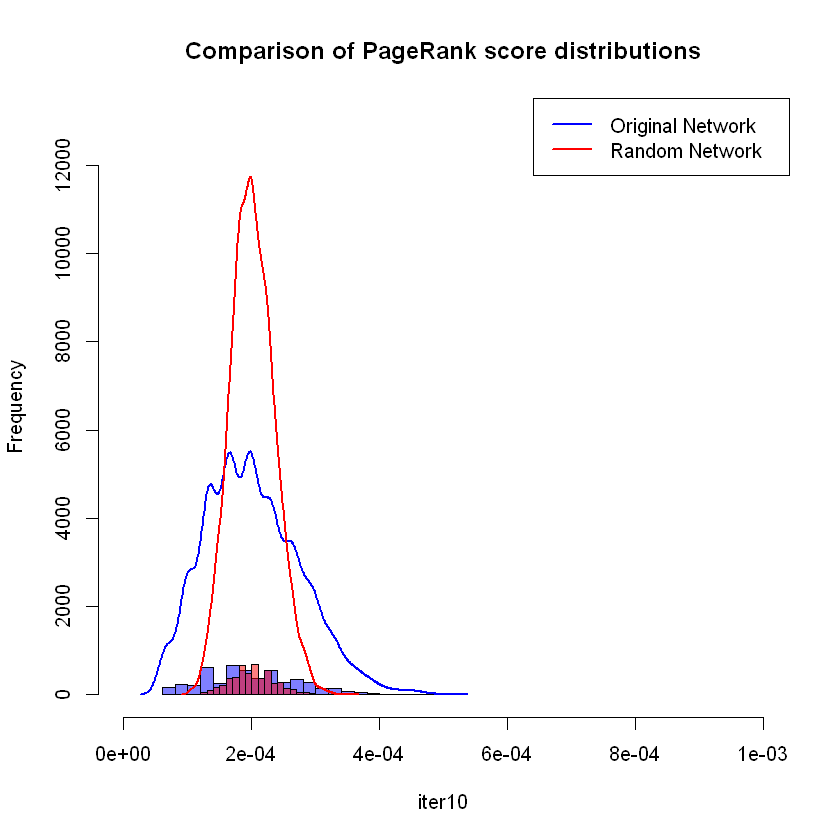

In [49]:
# Create a histogram of the scores for network 1
hist(iter10, col=rgb(0, 0, 1, alpha=0.5), xlim=c(0, 0.001), ylim=c(0, 13000), breaks=20,
     main="Comparison of PageRank score distributions")
# Add a line for the density of the scores for network 1
lines(density(iter10), col="blue", lwd=2)

# Add a histogram of the scores for network 2
hist(iter10_ran, col=rgb(1, 0, 0, alpha=0.5), xlim=c(0, 0.001), ylim=c(0, 6000), add=TRUE, breaks=20)
# Add a line for the density of the scores for network 2
lines(density(iter10_ran), col="red", lwd=2)



# Add a legend
legend("topright", c("Original Network", "Random Network"), col=c("blue", "red"), lwd=2)

Kolmogorov-Smirnov test: A high value for p-value suggests that there is not enough evidence to reject the null hypothesis, meaning that the distribution of the PageRank scores in the two networks is not significantly different and vice-versa

In [50]:
ks.test(iter10, iter10_ran)

Warning message in ks.test.default(iter10, iter10_ran):
"p-value will be approximate in the presence of ties"



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  iter10 and iter10_ran
D = 0.21978, p-value < 2.2e-16
alternative hypothesis: two-sided


In [51]:
# Check if there are any compnents that are not connected to the network

is.connected(network)

[1] TRUE

In [52]:
# Compute PageRank scores for damping factors of 0.8, 0.85, and 0.9
pr_scores_d0.8 <- page_rank(network, damping = 0.8)$vector
pr_scores_d0.85 <- page_rank(network, damping = 0.85)$vector
pr_scores_d0.9 <- page_rank(network, damping = 0.9)$vector

# Print the PageRank scores for each damping factor

cat("PageRank scores for damping factor of 0.85 compare to 0.8: ", sum(abs(pr_scores_d0.85-pr_scores_d0.8)), "\n")
cat("PageRank scores for damping factor of 0.9 compare to 0.8: ", sum(abs(pr_scores_d0.9-pr_scores_d0.8)), "\n")

PageRank scores for damping factor of 0.85 compare to 0.8:  0.02012659 
PageRank scores for damping factor of 0.9 compare to 0.8:  0.04185224 


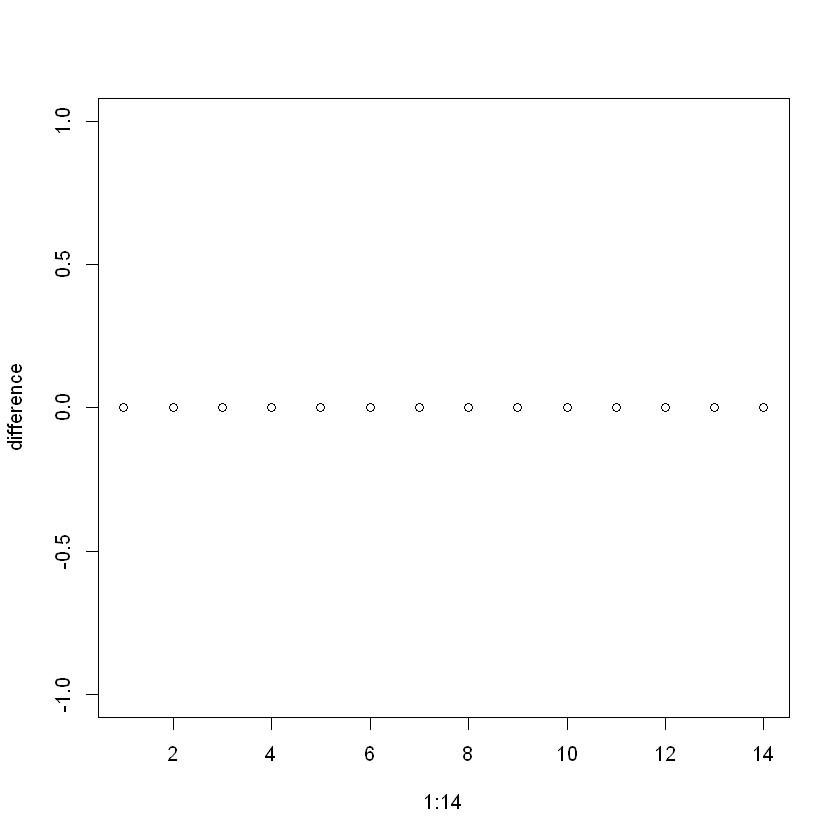

In [53]:
# Create an empty vector
value <- c()

# Write a loop to compute PageRank 
for(i in 1:15){
  value <- cbind(value, page.rank(network, algo = 'prpack',options = list(niter = i))$vector)
}
  
# Compute the differences 
difference <- colSums(abs(value[,1:14] - value[,2:15]))

# Plot the differences
plot(1:14, difference)

In [54]:
# Conclusion: There is a problem in the implemetnation of the number of iterations in the latest version of igraph XD XD 

page_rank

function (graph, algo = c("prpack", "arpack"), vids = V(graph), 
    directed = TRUE, damping = 0.85, personalized = NULL, weights = NULL, 
    options = NULL) 
{
    if (!is_igraph(graph)) {
        stop("Not a graph object")
    }
    algo <- switch(igraph.match.arg(algo), arpack = 1L, prpack = 2L)
    vids <- as.igraph.vs(graph, vids)
    directed <- as.logical(directed)
    damping <- as.numeric(damping)
    if (!is.null(personalized)) 
        personalized <- as.numeric(personalized)
    if (is.null(weights) && "weight" %in% edge_attr_names(graph)) {
        weights <- E(graph)$weight
    }
    if (!is.null(weights) && any(!is.na(weights))) {
        weights <- as.numeric(weights)
    }
    else {
        weights <- NULL
    }
    if (is.null(options)) {
        if (algo == 0L) {
            options <- list(niter = 1000, eps = 0.001)
        }
        else if (algo == 1L) {
            options <- arpack_defaults
        }
        else {
            options <- NULL
        }
    }
    on.exit(.Call(R_igraph_finalizer))
    res <- .Call(R_igraph_personalized_pagerank, graph, algo, 
        vids - 1, directed, damping, personalized, weights, options)
    if (igraph_opt("add.vertex.names") && is_named(graph)) {
        names(res$vector) <- vertex_attr(graph, "name", vids)
    }
    res
}
<bytecode: 0x000002111e79c168>
<environment: namespace:igraph>

## The Personalized PageRank

In personalized PageRank, the algorithm is modified to give higher weight to pages that are relevant to the user's interests, based on their browsing history or other data. For example, if a user has previously visited a lot of pages about basketball, pages about basketball will be given a higher score in the personalized PageRank calculation.

In [55]:
boxplots <- function(damping=0.85, personalized=FALSE){
  if(personalized){
    V(network)$pp<-page.rank(network,damping=damping,personalized = V(network)$churn)$vector
  }
  else{
  V(network)$pp<-page.rank(network,damping=damping)$vector
  }
  boxplot(V(network)$pp~V(network)$churn)#
}

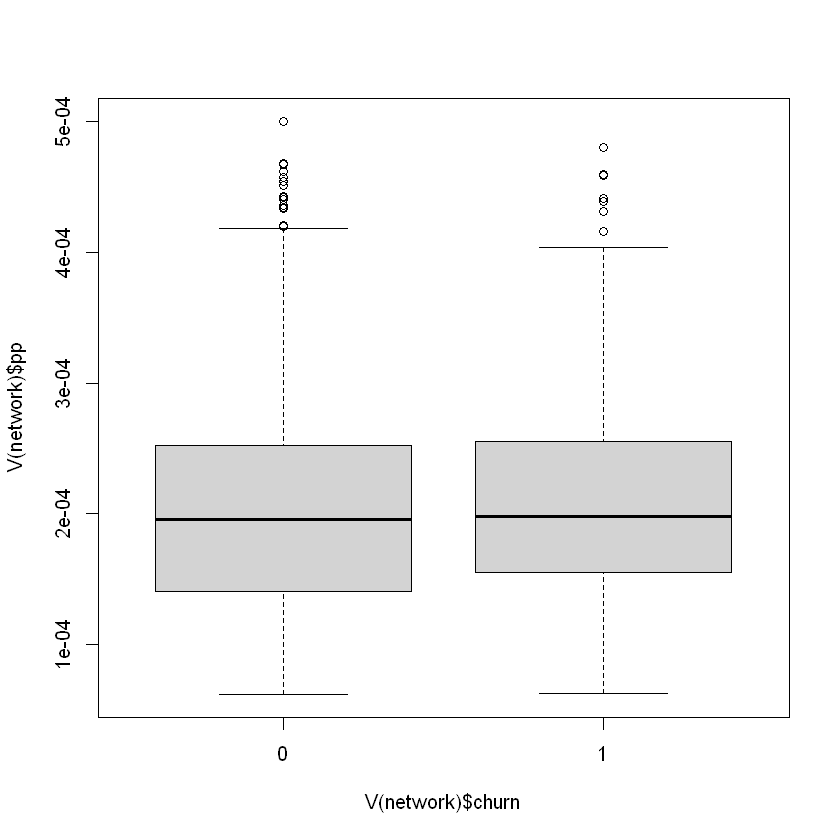

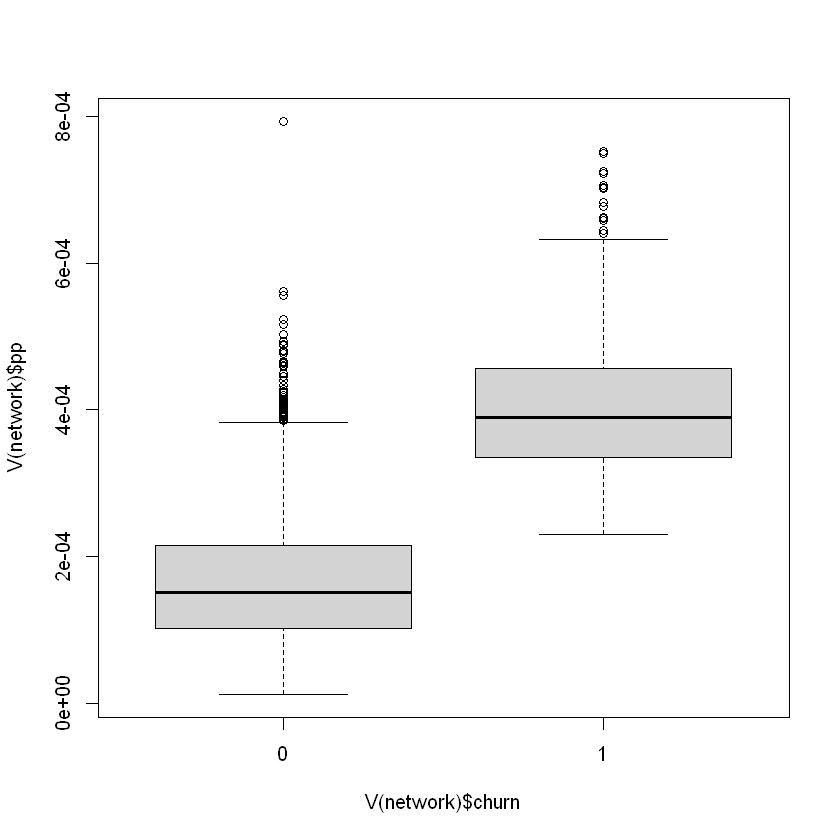

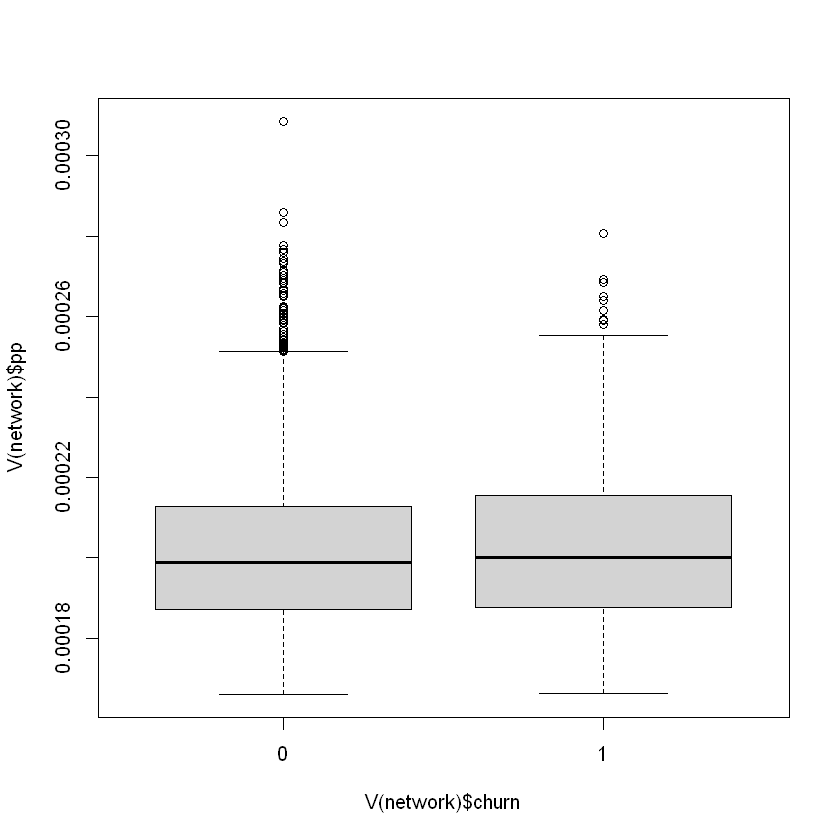

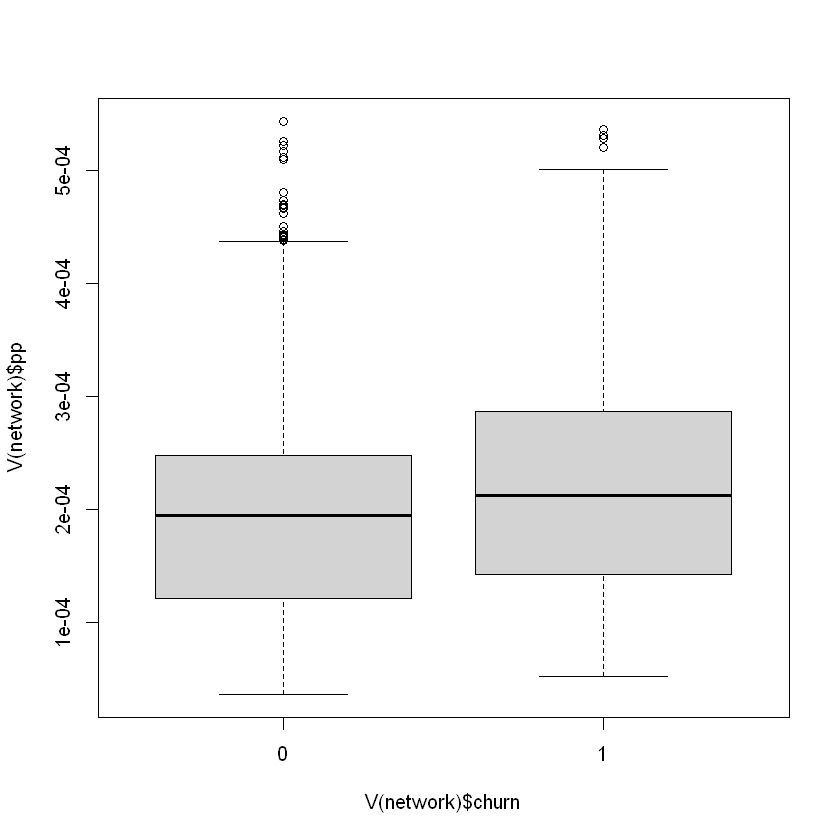

In [56]:
# Look at the distribution of standard PageRank scores
boxplots(damping = 0.85)

# Inspect the distribution of personalized PageRank scores
boxplots(damping = .85, personalized = TRUE)

# Look at the standard PageRank with damping factor 0.2
boxplots(damping = 0.2)

# Inspect the personalized PageRank scores with a damping factor 0.99
boxplots(damping = 0.99, personalized = TRUE)

In [57]:
# Compute the personalized PageRank score with damping 0.99
V(network)$perspr_0.99 <- page.rank(network,  damping = 0.99, personalized = V(network)$Churn)$vector

head(V(network)$perspr_0.99)

[1] 1.215871e-04 2.796918e-04 1.610356e-04 8.169779e-05 2.012273e-04
[6] 2.417866e-04

In [58]:
# Compute the personalized TRUE/FALSE PageRank score with damping 0.85

V(network)$perspr_0.85<-page.rank(network,damping=0.85,personalized = V(network)$churn)$vector
V(network)$pr_0.85<-page.rank(network,damping=0.85)$vector

## Change network to flat dataset

In [59]:
list.vertex.attributes(network)

[1] "name"                "churn"               "color"              
 [4] "degree"              "degree2"             "triangles"          
 [7] "betweenness"         "closeness"           "eigenCentrality"    
[10] "transitivity"        "ChurnNeighbors"      "NonChurnNeighbors"  
[13] "RelationalNeighbor"  "ChurnNeighbors2"     "NonChurnNeighbors2" 
[16] "RelationalNeighbor2" "averageDegree"       "averageTriangles"   
[19] "averageTransitivity" "averageBetweenness"  "perspr_0.99"        
[22] "perspr_0.85"         "pr_0.85"

In [60]:
# Extract the dataset
studentnetworkdata_full <- as_data_frame(network, what = 'vertices')

# Remove customers who already churned
studentnetworkdata_filtered <- studentnetworkdata_full[-which(studentnetworkdata_full$churn == 1), ]

# Remove useless columns
studentnetworkdata <- studentnetworkdata_filtered[, -c(1, 2)]

head(studentnetworkdata)

,color,degree,degree2,triangles,betweenness,closeness,eigenCentrality,transitivity,ChurnNeighbors,NonChurnNeighbors,⋯,ChurnNeighbors2,NonChurnNeighbors2,RelationalNeighbor2,averageDegree,averageTriangles,averageTransitivity,averageBetweenness,perspr_0.99,perspr_0.85,pr_0.85
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,white,0.0006044731,0.003223857,0,0.0001929510,0.1704327,0.07288149,0,0,3,⋯,3,9,0.25000000,0.0010074552,0.0,0.000000000,0.0007941257,1.215871e-04,9.860507e-05,0.0001397364
2,white,0.0014104372,0.007656659,0,0.0012730491,0.1885280,0.22122750,0,2,5,⋯,3,27,0.10000000,0.0010650240,0.0,0.000000000,0.0009426371,2.796918e-04,2.841896e-04,0.0002710237
3,white,0.0008059641,0.004029821,0,0.0003783724,0.1777770,0.11347160,0,2,2,⋯,2,13,0.13333333,0.0009570824,0.0,0.000000000,0.0007500646,1.610356e-04,2.485670e-04,0.0001732028
5,white,0.0004029821,0.002417892,0,0.0000703030,0.1646540,0.04941012,0,0,2,⋯,2,7,0.22222222,0.0011082007,0.0,0.000000000,0.0008107394,8.169779e-05,5.237443e-05,0.0001018776
6,white,0.0010074552,0.006447713,0,0.0008666186,0.1833056,0.17480979,0,1,4,⋯,1,25,0.03846154,0.0012492444,0.2,0.005555556,0.0012355079,2.012273e-04,1.450571e-04,0.0002104196
7,white,0.0012089462,0.006850695,0,0.0012448765,0.1865789,0.21284112,0,0,6,⋯,2,25,0.07407407,0.0011417825,0.0,0.000000000,0.0012450989,2.417866e-04,1.339183e-04,0.0002564651


In [61]:
apply(studentnetworkdata, 2,  function(x) sum(is.na(x)))

color              degree             degree2           triangles 
                  0                   0                   0                   0 
        betweenness           closeness     eigenCentrality        transitivity 
                  0                   0                   0                   0 
     ChurnNeighbors   NonChurnNeighbors  RelationalNeighbor     ChurnNeighbors2 
                  0                   0                   0                   0 
 NonChurnNeighbors2 RelationalNeighbor2       averageDegree    averageTriangles 
                  0                   0                   0                   0 
averageTransitivity  averageBetweenness         perspr_0.99         perspr_0.85 
                  0                   0                   0                   0 
            pr_0.85 
                  0

In [62]:
### Create dummy variable to inspect nulls 
studentnetworkdata$dummy_NA <- studentnetworkdata$RelationalNeighbor2
studentnetworkdata$dummy_NA[1:3] <- NA


# Inspect the feature
summary(studentnetworkdata$dummy_NA)

# Find the indices of the missing values
toReplace <- which(is.na(studentnetworkdata$dummy_NA))

# Replace the missing values with 0
studentnetworkdata$dummy_NA[toReplace] <- 0

# Inspect the feature again
summary(studentnetworkdata$dummy_NA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.1034  0.1538  0.1600  0.2083  1.0000       3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1034  0.1538  0.1599  0.2083  1.0000 

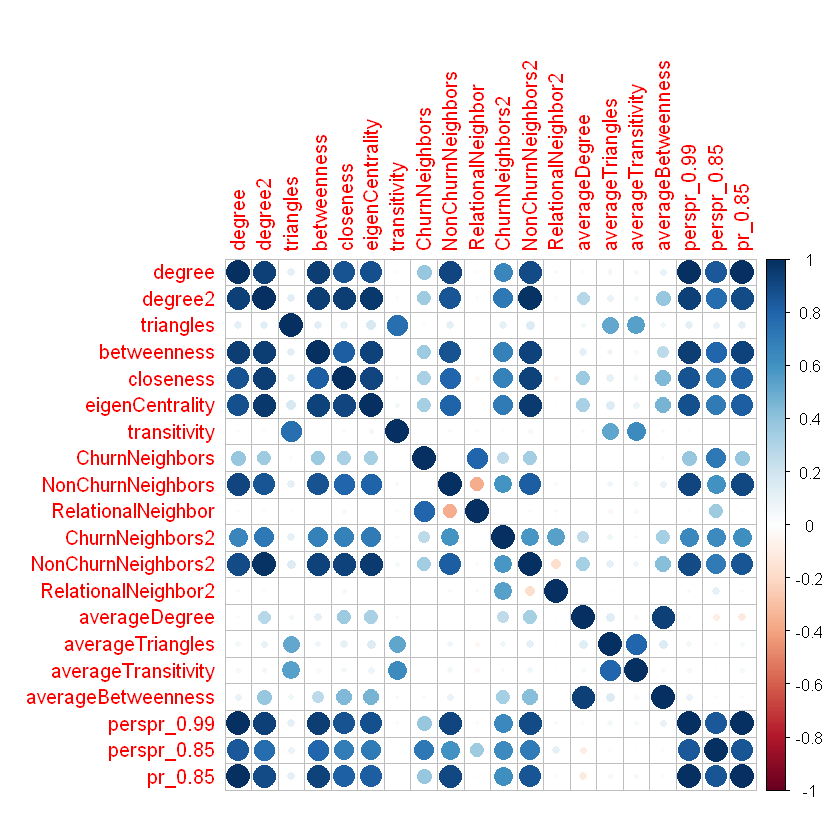

In [63]:
# Remove the Future column from studentnetworkdata 
no_dummy <- studentnetworkdata[, -ncol(studentnetworkdata)]
no_dummy <- no_dummy[, -1]

# Generate the correlation matrix
M <- cor(no_dummy)

# Plot the correlations
corrplot(M, method = "circle")

In [64]:
# Print the column names
colnames(studentnetworkdata_full)

# Create toRemove
toRemove <- c(1, 3)

# Remove the columns
studentnetworkdata_full_no_col <- studentnetworkdata_full[, -toRemove]

[1] "name"                "churn"               "color"              
 [4] "degree"              "degree2"             "triangles"          
 [7] "betweenness"         "closeness"           "eigenCentrality"    
[10] "transitivity"        "ChurnNeighbors"      "NonChurnNeighbors"  
[13] "RelationalNeighbor"  "ChurnNeighbors2"     "NonChurnNeighbors2" 
[16] "RelationalNeighbor2" "averageDegree"       "averageTriangles"   
[19] "averageTransitivity" "averageBetweenness"  "perspr_0.99"        
[22] "perspr_0.85"         "pr_0.85"

In [65]:
colnames(studentnetworkdata_full_no_col)

[1] "churn"               "degree"              "degree2"            
 [4] "triangles"           "betweenness"         "closeness"          
 [7] "eigenCentrality"     "transitivity"        "ChurnNeighbors"     
[10] "NonChurnNeighbors"   "RelationalNeighbor"  "ChurnNeighbors2"    
[13] "NonChurnNeighbors2"  "RelationalNeighbor2" "averageDegree"      
[16] "averageTriangles"    "averageTransitivity" "averageBetweenness" 
[19] "perspr_0.99"         "perspr_0.85"         "pr_0.85"

### Train the model

In [66]:
# Set the seed
set.seed(7)

# Creat the index vector
index_train <- sample(1:nrow(studentnetworkdata_full_no_col), 2 / 3 * nrow(studentnetworkdata_full_no_col))

# Make the training set
training_set <- studentnetworkdata_full_no_col[index_train,]

# Make the test set
test_set <- studentnetworkdata_full_no_col[-index_train,]

In [67]:
colnames(training_set)

[1] "churn"               "degree"              "degree2"            
 [4] "triangles"           "betweenness"         "closeness"          
 [7] "eigenCentrality"     "transitivity"        "ChurnNeighbors"     
[10] "NonChurnNeighbors"   "RelationalNeighbor"  "ChurnNeighbors2"    
[13] "NonChurnNeighbors2"  "RelationalNeighbor2" "averageDegree"      
[16] "averageTriangles"    "averageTransitivity" "averageBetweenness" 
[19] "perspr_0.99"         "perspr_0.85"         "pr_0.85"

In [68]:
# Build firstModel based on simple network features 
firstModel <- glm(churn ~ degree + degree2 + triangles + betweenness + closeness + transitivity,
                  family = 'binomial', data = training_set)


In [69]:
# Build secondModel based on link-based network features
secondModel <- glm(churn ~ ChurnNeighbors + RelationalNeighbor + ChurnNeighbors2 + RelationalNeighbor2 + averageDegree + averageTriangles + averageTransitivity + averageBetweenness, 
                   family = 'binomial', data = training_set)

In [70]:
# Build thirdModel based on both network features
thirdModel <- glm(churn~., family = 'binomial', data = training_set)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


### Define if multicollinearity is the problem

In [71]:
# Trial to define if multicollinearity is the problem
vif(thirdModel)

ERROR: Error in vif.default(thirdModel): there are aliased coefficients in the model


In [121]:
correlation <- cor(training_set$perspr_0.99, training_set$pr_0.85)

# print the correlation
print(correlation)

[1] 0.9927908


In [72]:
# Build the model - Only depending on one predictor perspr_0.85
fourthModel <- glm(churn~perspr_0.85, family = 'binomial', data = training_set)

In [73]:
# Count the number of churners and non-churners
table(training_set$churn)


   0    1 
2773  536 

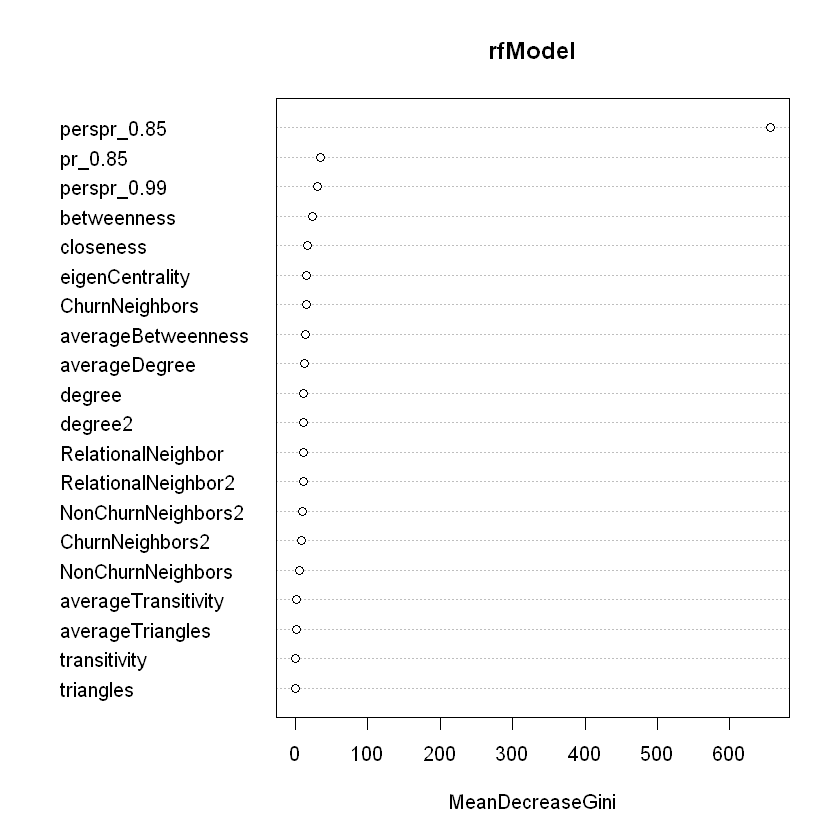

In [74]:
# Set seed
set.seed(123)

# Build model
rfModel <- randomForest(as.factor(churn)~. ,data=training_set)

# Plot variable importance
varImpPlot(rfModel)

In [75]:
# Predict with the first model
firstPredictions <- predict(firstModel, newdata = test_set, type = "response")

# Predict with the second model
secondPredictions <- predict(secondModel, newdata = test_set, type = "response")

# Predict with the third model
thirdPredictions <- predict(thirdModel, newdata = test_set, type = "response")

# Predict with the fourth model
fourthPredictions <- predict(fourthModel, newdata = test_set, type = "response")

# Predict with the rfModel
rfPredictions<- predict(rfModel, newdata = test_set, type= "prob")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


### Evaluate using AUC

In [76]:
# For logistic regression, it is the prediction obtained from the predict function
auc(test_set$churn, firstPredictions)

auc(test_set$churn, secondPredictions)

auc(test_set$churn, thirdPredictions)

auc(test_set$churn, fourthPredictions)

# For random forest, it is the second column of the prediction obtained from the predict function
auc(test_set$churn, rfPredictions[,2])


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.4982

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.5123

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 1

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9739

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9995

### Evaluate using TopDecileLift

In [107]:
TopDecileLift(test_set$churn, firstPredictions)

TopDecileLift(test_set$churn, secondPredictions)

TopDecileLift(test_set$churn, thirdPredictions)

TopDecileLift(test_set$churn, fourthPredictions)

TopDecileLift(test_set$churn, rfPredictions[,2])


[1] 1.015

[1] 1.011

[1] 6.953

[1] 4.996

[1] 5.764

AUC for only using the perspr_0.85 predictor in a logistic regression is 0.97, which means there is a separation problem 

#### Visualize Network different features 

#### simple network features

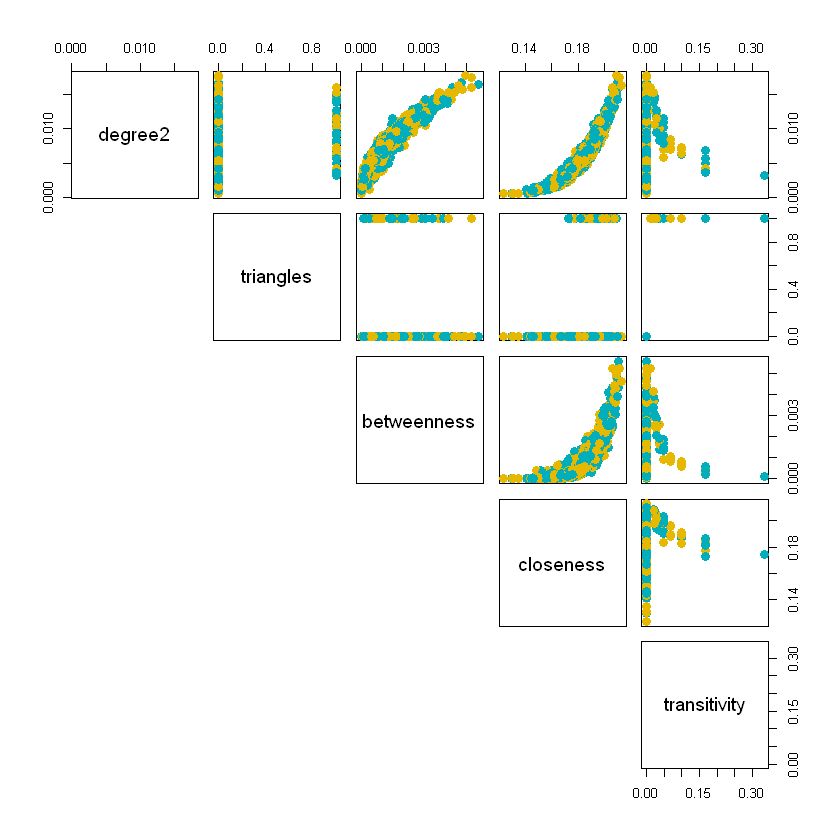

In [96]:
my_cols <- c("#00AFBB", "#E7B800")  

selected_cols <- training_set[, c("churn", "degree2", "triangles", "betweenness", "closeness", "transitivity")]

pairs(selected_cols[,-1], pch = 19,  cex = 1.5,
      col = my_cols,
      lower.panel=NULL)

#### link-based features

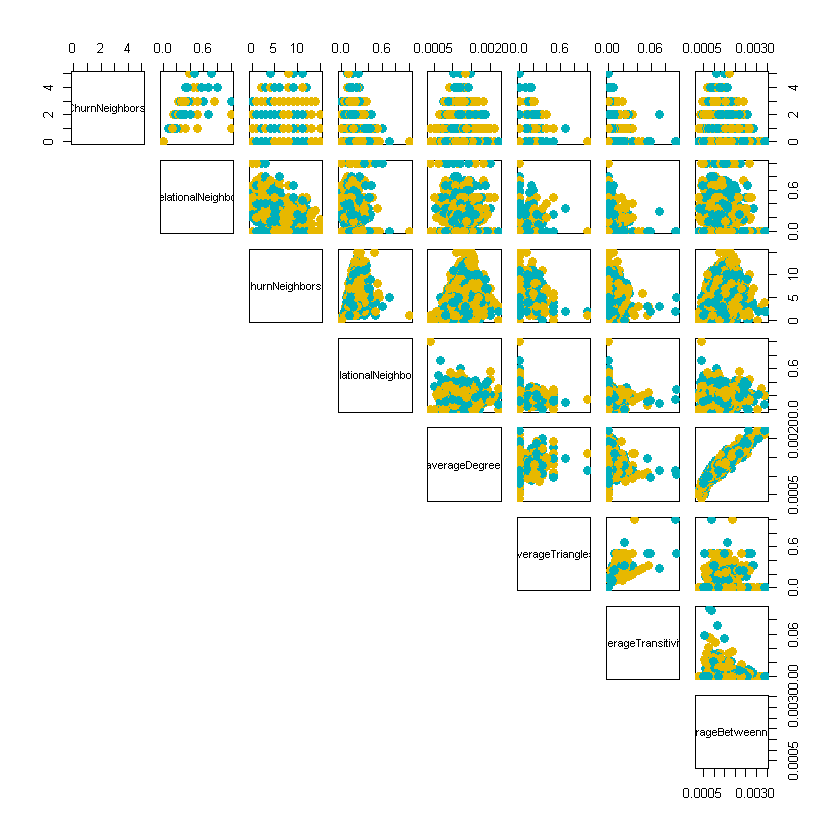

In [94]:
my_cols <- c("#00AFBB", "#E7B800")  

# calculate scaling factor for minority class
#minority_scaling_factor <- sum(training_set$churn == 1) / sum(training_set$churn == 0)
#cex = ifelse(selected_cols$churn == 0, 1.5, 1.5*minority_scaling_factor),# increase the size of the plot points,

selected_cols <- training_set[, c("churn", "ChurnNeighbors", "RelationalNeighbor", "ChurnNeighbors2", "RelationalNeighbor2",
"averageDegree", "averageTriangles", "averageTransitivity", "averageBetweenness" )]

pairs(selected_cols[,-1], pch = 19,  cex = 1.5,
      col = my_cols,
      lower.panel=NULL)

#### PageRank features

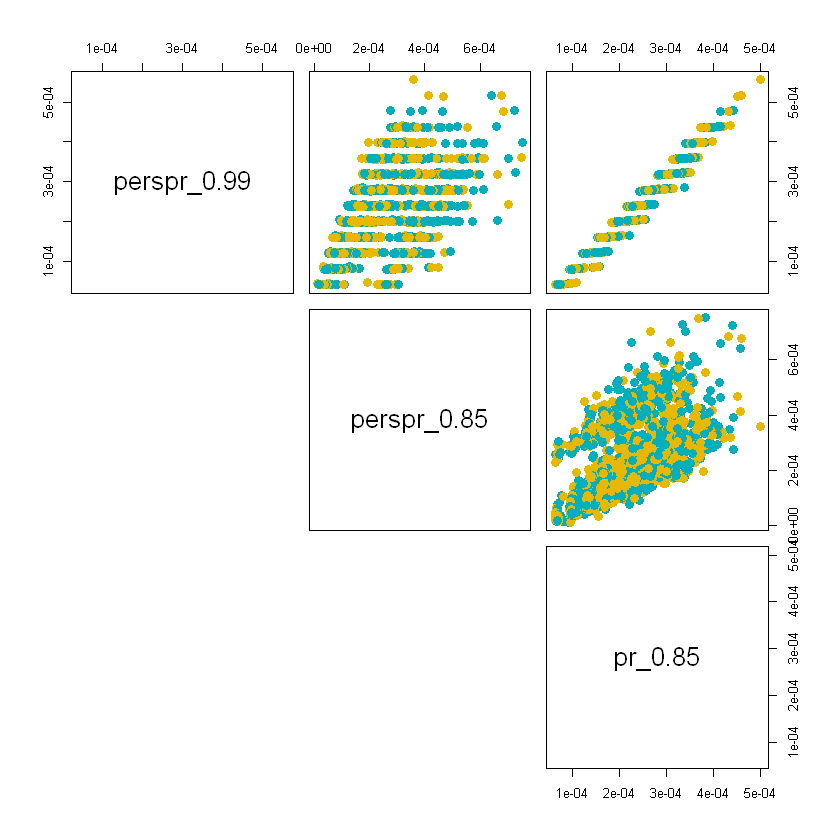

In [109]:
my_cols <- c("#00AFBB", "#E7B800")  

selected_cols <- training_set[, c("churn", "perspr_0.99", "perspr_0.85", "pr_0.85")]

pairs(selected_cols[,-1], pch = 19,  cex = 1.5,
      col = my_cols,
      lower.panel=NULL)

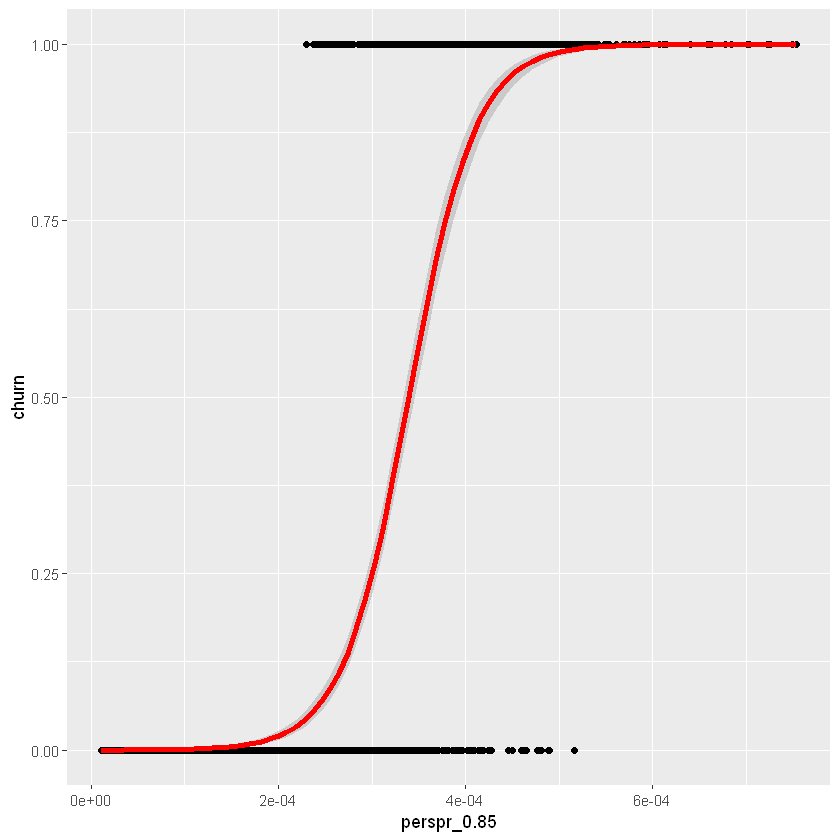

In [113]:
# Create a scatterplot of response vs. predictor1
p <- ggplot(training_set, aes(x = perspr_0.85, y = churn)) +
  geom_point()

# Add a line representing the fitted logistic regression model
p + stat_smooth(method = "glm", method.args = list(family = "binomial"), formula = y ~ x, linewidth = 1.5, color = "red")